<a href="https://colab.research.google.com/github/satuelisa/ICN2024/blob/main/S4_resist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 4
## Robustness and resilience of networked systems

In [18]:
import networkx as nx
n = 40
G = nx.barabasi_albert_graph(n, 5)
m = G.number_of_edges()

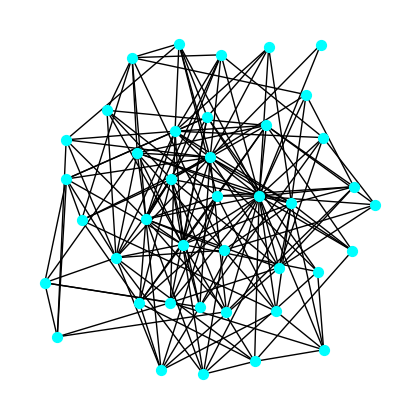

In [19]:
L = nx.kamada_kawai_layout(G)

import matplotlib.pyplot as plt
fig = plt.figure(1, figsize = (4, 4), dpi =  100)
nx.draw(G, L, node_size = 50, node_color = 'cyan')

In [20]:
count = 5
for e in G.edges():
  print(e)
  count -= 1
  if count == 0:
    break

(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)


In [7]:
!pip install celluloid

4 0
0 26
26 34
34 33
33 22
22 8
8 18
18 30
30 9
9 0
0 27
27 8


[]

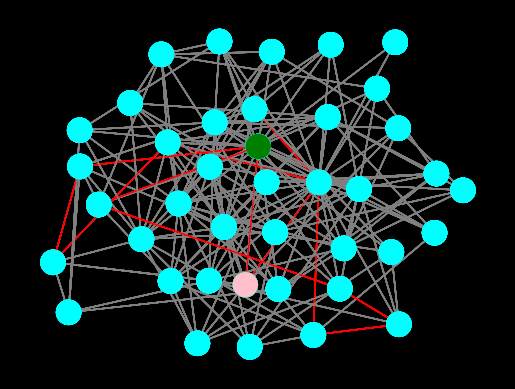

In [22]:
from random import choice # pseudo-randomness
from celluloid import Camera # creating animations

fig, ax = plt.subplots()
cam = Camera(fig) # for storing the frames

current = choice(list(G.nodes()))

used = set()
for paso in range(12): # random walk
    neighbor = choice(list(G.neighbors(current)))
    used.add((current, neighbor))
    used.add((neighbor, current))

    vc = [ 'cyan' for v in G.nodes() ]
    vc[current] = 'pink'
    vc[neighbor] = 'green'

    ec = [ 'red' if e in used else 'gray' for e in G.edges() ]

    nx.draw(G, pos = L, node_color = vc, edge_color = ec)

    ax.set_facecolor('black')
    fig.set_facecolor('black')
    ax.axis('off')
    print(current, neighbor)
    cam.snap() # take a snapshot
    current = neighbor

cam.snap() # take a snapshot at the end

In [23]:
import IPython
animation = cam.animate(interval = 600) # milliseconds between frames
show = display(IPython.display.HTML(animation.to_html5_video()))